# code use to batch format files for spacetx format

In [1]:
import sys
print(sys.path)
print(sys.executable)
import os
from typing import Mapping, Tuple, Union
import numpy as np
from starfish.types import Axes, Coordinates, Features, Number
from starfish import Codebook
from starfish.experiment.builder import FetchedTile, TileFetcher
from slicedimage import ImageFormat
from skimage.io import imread
from starfish.experiment.builder import write_experiment_json

['C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\python36.zip', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\DLLs', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\lib', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher', '', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\lib\\site-packages', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\lib\\site-packages\\win32', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\lib\\site-packages\\win32\\lib', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\lib\\site-packages\\Pythonwin', 'C:\\Users\\sergio.salas\\Miniconda3\\envs\\starfisher\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\sergio.salas\\.ipython']
C:\Users\sergio.salas\Miniconda3\envs\starfisher\python.exe


## define functions

In [2]:
# hakuna matata
#if not os.path.isdir(output_dir):
#   try:
#        os.mkdir(output_dir)
#    except:
#        os.makedirs(output_dir)


def add_codebook(experiment_json_doc):
    experiment_json_doc['codebook'] = "codebook.json"
    return experiment_json_doc


def make_codebook_json(codebook_csv):
    """ convert color code matrix in csv to json format"""
    codebook_array = []
    with open(codebook_csv, "r") as f:
        for line in f:
            line = line.rstrip('\n').split(',')
            codewords = []
            for r, colorcode in enumerate(line[1:]):
                codewords.append({Axes.ROUND.value: r,
                                  Axes.CH.value: int(colorcode)-1,
                                  Features.CODE_VALUE:1})
            codebook_array.append({Features.CODEWORD:codewords, Features.TARGET: line[0]})
    codebook = Codebook.from_code_array(codebook_array)
    codebook_json_filename = "codebook.json"
    codebook.to_json(os.path.join(output_dir, codebook_json_filename))

def get_tilepos(tilepos_xy_csv):
    tilexy = np.ndarray((0,2))
    with open(tilepos_xy_csv, 'r') as f:
        for line in f:
            line = line.rstrip('\n').split(',')
            tilexy = np.vstack([tilexy, [np.double(line[0]), np.double(line[1])]])
    return tilexy

# TODO: skip reading and writing of images
class ISSTile2D(FetchedTile):
    def __init__(self, file_path, fov):
        self.file_path = file_path
        self.fov = fov

    @property
    def shape(self) -> Tuple[int, ...]:
        return SHAPE

    @property
    def coordinates(self) -> Mapping[Union[str, Coordinates], Union[Number, Tuple[Number, Number]]]:
        return {
            Coordinates.X: (tilexy[self.fov, 0]*pixelscale, (tilexy[self.fov, 0] + tilesz)*pixelscale),
            Coordinates.Y: (tilexy[self.fov, 1]*pixelscale, (tilexy[self.fov, 1] + tilesz)*pixelscale),
            Coordinates.Z: (0.0, 0.0),
        }

    def tile_data(self) -> np.ndarray:
        return imread(self.file_path)


class ISS2DPrimaryTileFetcher(TileFetcher):
    def __init__(self, path):
        self.path = path

    def get_tile(self, fov: int, r: int, ch: int, z: int) -> FetchedTile:
        return ISSTile2D(os.path.join(self.path, "{}-{}/tile{}.tif".format(FILENAME[r], CHORDER[ch]+1, fov+1)), fov)


class ISS2DAuxTileFetcher(TileFetcher):
    def __init__(self, path, filename_prefix):
        self.path = path
        self.prefix = filename_prefix

    def get_tile(self, fov: int, r: int, ch: int, z: int) -> FetchedTile:
        return ISSTile2D(os.path.join(self.path, self.prefix + "{}.tif".format(fov+1)), fov)




In [3]:
mainpath = 'D:/Processing/689C_LNG5/'
path = mainpath
folders_to_remove = ['ReslicedTiles','preprocessing2', 'preprocessing3',
 'SpaceTX_format','Cycle_1', 'Cycle_2', 'Cycle_3', 'Cycle_4', 'Cycle_5','Cycle 1', 'Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5',
 'starfish_output_MATCHHISTO_PIXEL', 'starfish_output'
 'starfish_output_MATCHHISTO_PIXEL_0025',
 'starfish_output_MATCHHISTO_PIXEL_01','starfish_output',
 'starfish_output_MATCHHISTO_SPOT_0025','Stitched2DTiles_MIST_Ref1', 'starfish_output_2',
 'starfish_output_standard_setting_005',
 'starfish_output_standard_setting_0075',
 'starfish_output_with_qualities','preprocessing_base2',
 'preprocessing_base3',
 'preprocessing_base4',
 'preprocessing_base5',
 'starfish_output_with_qualities_2000']
#output = [dI for dI in os.listdir(path) if os.path.isdir(os.path.join(path,dI))]
#output_cleaned = [x for x in output if x not in folders_to_remove]
output_cleaned=['preprocessing']
output_cleaned

['preprocessing']

## create folders to output the spacetx formatted data

In [4]:
for i, slide_tag in enumerate(output_cleaned): 
    path = mainpath + '/'+slide_tag
    if not os.path.exists(path):
        os.mkdir(path)
        
    path1 = mainpath + '/'+slide_tag+'/SpaceTX_format'
    if not os.path.exists(path1):
        os.mkdir(path1)
    

## rename folders to fit with the format


## main loop

In [5]:
for i, slide_tag in enumerate(output_cleaned): 
    print(slide_tag)
    channels=['AF750','Cy5','Cy3','AF488','DAPI']
    #channels_zeiss = ["DAPI","Cy3", "Cy5", "AF750", "AF488"]
    FILENAME = [ 'Base_1_stitched',
    'Base_2_stitched',
    'Base_3_stitched',
    'Base_4_stitched',
           'Base_5_stitched']
    # codebook in csv (column 1: code, column2-x: color code in each round)
                
    # AVOID comma in gene names (column 1)
    codebook_csv = 'D:/Processing/Discovair_codebook.csv'
    DO_decorators = ["AF750", "AF488","Cy3","Cy5"] #Switch two last 3425
    CHORDER = [channels.index(i) for i in DO_decorators]

    # tile position and metadata
    # TODO: read metadata using bio-format
    pixelscale = 0.1625
    tilepos_xy_csv =mainpath + '/'+slide_tag+'/ReslicedTiles/tilepos.csv'
    num_tiles = len(os.listdir(mainpath + '/'+slide_tag+'/ReslicedTiles/Base_1_stitched-1'))

    # not sure why this is so important and can't be read from image itself...
    tilesz = 6000
    SHAPE = {Axes.Y: tilesz, Axes.X: tilesz} 

    # file location
    input_dir = mainpath + '/'+slide_tag+'/ReslicedTiles'
    output_dir = mainpath + '/'+slide_tag+'/SpaceTX_format'
    # hakuna matata
    if not os.path.isdir(output_dir):
        try:
            os.mkdir(output_dir)
        except:
            os.makedirs(output_dir)

    tilexy = get_tilepos(tilepos_xy_csv)


    write_experiment_json(
        path=output_dir, fov_count=num_tiles, tile_format=ImageFormat.TIFF,
        primary_image_dimensions={
            Axes.ROUND: 5,
            Axes.CH: 4,
            Axes.ZPLANE: 1,
        },
        aux_name_to_dimensions={
            'nuclei': {
                Axes.ROUND: 5,
                Axes.CH: 1,
                Axes.ZPLANE: 1,
            },
            # 'dots': {
            #     Axes.ROUND: 1,
            #     Axes.CH: 1,
            #     Axes.ZPLANE: 1,
            # },
        },
        primary_tile_fetcher=ISS2DPrimaryTileFetcher(input_dir),
        aux_tile_fetcher={
            'nuclei': ISS2DAuxTileFetcher(input_dir, FILENAME[0] + "-5/tile"),
            # 'dots': ISS2DAuxTileFetcher(input_dir, FILENAME[0] + "-5/tile"),
        },
        postprocess_func=add_codebook,
        default_shape=SHAPE
    )

    make_codebook_json(codebook_csv)


    # why the fuck do they give full path now
    from shutil import copyfile
    # folder = r"H:\HCA\HCA_09b_mouse_120genes\STARFISH\smallTiles"
    ls = os.listdir(output_dir)
    os.mkdir(os.path.join(output_dir, "originaljsons"))
    for file in ls:
        if file[-4:] == 'json':
            copyfile(os.path.join(output_dir, file), os.path.join(output_dir, "originaljsons", file))
            with open(os.path.join(output_dir, "originaljsons", file), 'r') as fr:
                with open(os.path.join(output_dir, file), 'w') as fw:
                    for line in fr:
                        fw.write("%s" % line.replace(output_dir.replace('\\', '\\\\') + '\\\\', ''))



preprocessing


#### SHAPE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import starfish
from copy import deepcopy
from starfish import data, FieldOfView, display
from starfish.image import Filter
from starfish.spots import DetectPixels
from starfish.types import Axes, Features, Levels

In [2]:
import os
import starfish
from starfish import data, FieldOfView
from starfish.image import ApplyTransform, Filter, LearnTransform, Segment
from starfish.spots import FindSpots, DecodeSpots, AssignTargets
from starfish.types import Axes, FunctionSource, Levels
from starfish.core.expression_matrix.expression_matrix import ExpressionMatrix
from starfish.core.intensity_table.intensity_table import IntensityTable
test = os.getenv("TESTING") is not None
from starfish.core.spots.DecodeSpots.trace_builders import build_spot_traces_exact_match
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from starfish.types import Axes, TraceBuildingStrategies
import warnings
warnings.filterwarnings('ignore')

In [3]:
def iss_pipeline(fov, codebook):
    primary_image = fov.get_image(FieldOfView.PRIMARY_IMAGES) # primary images
    dots = primary_image.reduce({Axes.CH, Axes.ROUND}, func="max") # reference round for image registration
    # register the raw image
#    learn_translation = LearnTransform.Translation(reference_stack=dots, axes=Axes.ROUND, upsampling=100)
#    transforms_list = learn_translation.run(primary_image.reduce({Axes.CH, Axes.ZPLANE}, func="max"))
#    warp = ApplyTransform.Warp()
#    registered = warp.run(primary_image, transforms_list=transforms_list,  in_place=False, verbose=True)
    # filter raw data
    registered=primary_image
    masking_radius = 7
    filt = Filter.WhiteTophat(masking_radius, is_volume=False)
    filtered = filt.run(registered, verbose=True, in_place=False)
   # filtered=registered
    sbp = starfish.image.Filter.MatchHistograms({Axes.CH, Axes.ROUND})
    #sbp = starfish.image.Filter.ClipPercentileToZero(p_min=80, p_max=99.999999, level_method=Levels.SCALE_BY_CHUNK)
    scaled = sbp.run(filtered, n_processes = 1, in_place=False)
    imagine: starfish.ImageStack = filtered.sel(
    {Axes.ROUND: (0, 0), Axes.X: (0, 6000), Axes.Y: (0, 6000)}
    )
    dots1 = imagine.reduce({Axes.CH}, func="max")
    learn_translation = LearnTransform.Translation(reference_stack=dots1, axes=Axes.ROUND, upsampling=1000)
    transforms_list = learn_translation.run(scaled.reduce({Axes.CH, Axes.ZPLANE}, func="max"))
    warp = ApplyTransform.Warp()
    scaled = warp.run(scaled, transforms_list=transforms_list,  in_place=False, verbose=True)
    # find threshold
    #tmp = dots.sel({Axes.ROUND:0, Axes.CH:0, Axes.ZPLANE:0})
    #dots_threshold = np.percentile(np.ravel(tmp.xarray.values), 50)
    bd = FindSpots.BlobDetector(
        min_sigma=1,
        max_sigma=10,
        num_sigma=30,
        threshold=0.0005,
        measurement_type='mean',
    )
    # detect spots using laplacian of gaussians approach
    # locate spots in a reference image
#    dots = filtered.reduce({Axes.CH, Axes.ROUND}, func="max") # reference round for image registration
    # detect spots using laplacian of gaussians approach
    dots_max = dots1.reduce((Axes.ROUND, Axes.ZPLANE), func="max")
    # locate spots in a reference image
    spots = bd.run(reference_image=dots_max, image_stack=scaled)
    decoder = DecodeSpots.MetricDistance(
        codebook=experiment.codebook,
        max_distance=1,
        min_intensity=1,
        metric='euclidean',
        norm_order=2,
        trace_building_strategy=TraceBuildingStrategies.EXACT_MATCH
    )
    decoded = decoder.run(spots=spots)
    # Build IntensityTable with same TraceBuilder as was used in MetricDistance
    intensities = build_spot_traces_exact_match(spots)
    
    # Get vector magnitudes, deal with empty tiles
    if intensities.size == 0: 
        print('No spots found')
    else:
        norm_intensities, vector_magnitude = experiment.codebook._normalize_features(intensities, norm_order=2)
    
    # Get distances
    distances = decoded.to_decoded_dataframe().data['distance'].to_numpy()
    return decoded,distances

In [4]:
# process all the fields of view, not just one
def process_experiment(experiment: starfish.Experiment):
    decoded_intensities = {}
    int_intensities = {}
    regions = {}
    for i, (name_, fov) in enumerate(experiment.items()):
        print(name_)
        try:
            [decoded,intensities]= iss_pipeline(fov, experiment.codebook)
            decoded_intensities[name_] = decoded
            int_intensities[name_] = intensities
        except:
            print('No blobs in tile')
        if test and i == 1:
        # only run through 2 fovs for the test
            break
    return decoded_intensities,int_intensities




In [8]:
starfish_output = 'D:/Processing/689C_LNG5/preprocessing/starfish_output_with_qualities_external_alignment_jan22_0000_5/'
if not os.path.exists(starfish_output):
    os.mkdir(starfish_output)
import os
csv_files = sorted(os.listdir(starfish_output))
print(len(csv_files))
file ='D:/Processing/689C_LNG5/preprocessing/SpaceTX_format/experiment.json'# add the path to the experiment.json file that you want to process
experiment = starfish.Experiment.from_json(file)
all_fovs = list(experiment.keys())
try:
    fovs_done = list(pd.DataFrame(csv_files)[0].str.split('.',expand = True)[0])
except KeyError:
    print('no FOVS done')
    fovs_done = []
not_done = [x for x in all_fovs if x not in fovs_done]

16


In [9]:
not_done

[]

In [ ]:
for i in not_done:
    print(i)
    fov = experiment[i]
    try:
        
        decoded,intensities = iss_pipeline(fov, experiment.codebook)
        featuresDF = (decoded.to_features_dataframe())
        int_array=np.array(decoded)
        vals1=np.max(int_array[:,0,:],axis=1)/np.sum(int_array[:,0,:],axis=1)
        vals2=np.max(int_array[:,1,:],axis=1)/np.sum(int_array[:,1,:],axis=1)
        vals3=np.max(int_array[:,2,:],axis=1)/np.sum(int_array[:,2,:],axis=1)
        vals4=np.max(int_array[:,3,:],axis=1)/np.sum(int_array[:,3,:],axis=1)
        vals5=np.max(int_array[:,4,:],axis=1)/np.sum(int_array[:,4,:],axis=1)
        qcscore_mean=np.mean(np.array([vals1,vals2,vals3,vals4,vals5]),axis=0)
        qcscore_minimum=np.min(np.array([vals1,vals2,vals3,vals4,vals5]),axis=0)
        featuresDF['qcscore_mean']=qcscore_mean
        featuresDF['qcscore_minimum']=qcscore_minimum
        featuresDF['qc_base1']=vals1
        featuresDF['qc_base2']=vals2
        featuresDF['qc_base3']=vals3
        featuresDF['qc_base4']=vals4
        featuresDF['qc_base5']=vals5
        featuresDF.to_csv(starfish_output + i+'.csv')
       # intensities.to_csv('')
    except:
        print("No Blobs")
   

fov_007


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]


fov_008


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


In [31]:
for i in not_done:
    print(i)
    fov = experiment[i]
    try:
        decoded,intensities = iss_pipeline(fov, experiment.codebook)
        featuresDF = (decoded.to_features_dataframe())
        featuresDF.to_csv(starfish_output + i+'.csv')
    except:
        print("No Blobs")
    

fov_012


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.19it/s]


In [12]:
import pandas as pd
path ='D:/Processing/689C_LNG5/preprocessing/starfish_output_with_qualities_external_alignment_jan22_0000_5/'
import os
csv_files = sorted(os.listdir(path))
print(len(csv_files))
append_data = []
for i in csv_files:
        df = pd.read_csv(path + i)
        df['samp']=i
        append_data.append(df)
df_concat = pd.concat(append_data)
spots_filt = df_concat[df_concat['target'].notna()]#

16


In [13]:
spots_filt['xc']=spots_filt.xc/0.1625
spots_filt['yc']=spots_filt.yc/0.1625

In [14]:
spots_filt.to_csv('D:/Processing/689C_LNG5/preprocessing/DECODED_689C_LNG5_manual_and_ST_alignment.csv')

In [15]:
spots_filt.shape

(999482, 28)

In [16]:
spots_filt=spots_filt.loc[spots_filt['qcscore_minimum']>0.4,:]

In [17]:
spots_filt2=spots_filt.loc[spots_filt['qcscore_mean']>0.5,:]

In [18]:
spots_filt3=spots_filt2[spots_filt2.distance<0.9]

In [19]:
spots_filt3.shape

(610146, 28)

In [20]:
spots_filt3.to_csv('D:/Processing/689C_LNG5/preprocessing/DECODED_689C_LNG5_manual_and_ST_alignment_filt.csv')

In [21]:
appended_data_non_nan=spots_filt

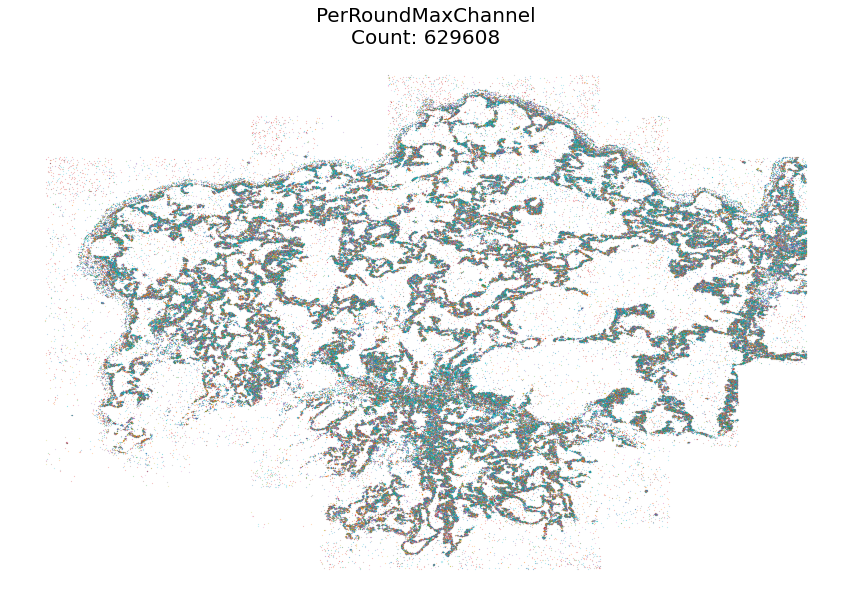

In [22]:
# scatter plotting groups
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
groups1 = appended_data_non_nan.groupby('target')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name1, group1 in groups1:
    ax.plot(group1.xc, group1.yc, marker='o', linestyle='', ms=0.1, label=name1)
#ax.legend()
plt.gca().invert_yaxis()
plt.axis('off')
plt.title('PerRoundMaxChannel' + '\n' + 'Count: ' + str(appended_data_non_nan.shape[0]), size = 20)
plt.show()

In [32]:
spots_filt=spots_filt.loc[spots_filt['qcscore_minimum']>0.4,:]

In [33]:
spots_filt.to_csv('X:/DiscovAIR_PT2/TEST1S51/DECODED_S5_DISCOVAIR_manual_and_ST_alignment_qcmean04_filt.csv')

In [ ]:
spots_filt.to_csv('X:/DiscovAIR_PT2/TEST1S51/DECODED_S5_DISCOVAIR_decoding.csv')

In [ ]:
spots_filt2=spots_filt

In [13]:
spots_filt1=spots_filt

In [14]:
spots_filt3=spots_filt

In [15]:
spots=pd.concat([spots_filt1, spots_filt2,spots_filt3], ignore_index=True)

In [45]:
#spots.to_csv('J:/LUNG/S1T1/decoded_P123_S1T1_allDECmetricbased.csv')

In [16]:
spots_filt

,Unnamed: 0,intensity,z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds
0,0,0.000189,0,5999,5993,4.0,0,0,1,5996,6000,5990,5997,0,5993.999000,6000.0,0.0,MT2A,0.663777,False
1,1,0.000197,0,5999,5969,5.0,1,0,1,5995,6000,5965,5974,1,5969.994999,6000.0,0.0,SLPI,0.592246,False
2,2,0.000434,0,5999,5950,5.0,2,0,1,5995,6000,5946,5955,2,5950.991832,6000.0,0.0,HDC,1.037679,False
3,3,0.000301,0,5999,5817,7.0,3,0,1,5993,6000,5811,5824,3,5817.969662,6000.0,0.0,FCN3,0.559003,False
4,4,0.000363,0,5999,5712,15.0,4,0,1,5985,6000,5698,5727,4,5712.952159,6000.0,0.0,VIM,0.736887,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73642,73642,0.000002,0,0,5712,3.0,73642,0,1,0,3,5710,5715,73642,5712.952159,0.0,0.0,SFTPA1,1.069040,False
73643,73643,0.000002,0,0,5701,6.0,73643,0,1,0,6,5696,5707,73643,5701.950325,0.0,0.0,CDC20B,1.041636,False
73644,73644,0.000002,0,0,1820,8.0,73644,0,1,0,8,1813,1828,73644,1820.303384,0.0,0.0,GRP,1.077821,False
73645,73645,0.000002,0,0,1798,6.0,73645,0,1,0,6,1793,1804,73645,1798.299717,0.0,0.0,GRP,1.066790,False


In [17]:
appended_data_non_nan=spots_filt

In [18]:
appended_data_non_nan.shape

(73647, 20)

In [19]:
#appended_data_non_nan=df

In [20]:
appended_data_non_nan=spots

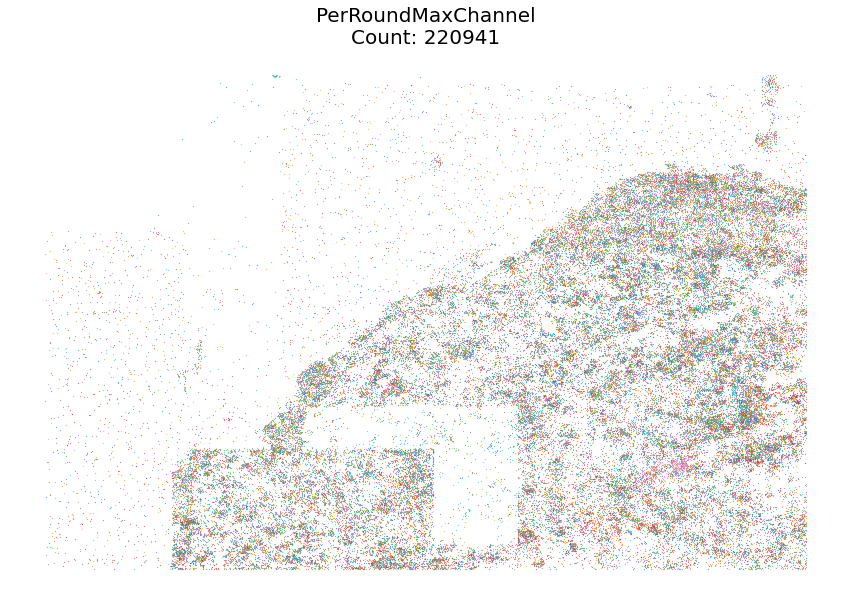

In [21]:
# scatter plotting groups
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
groups1 = appended_data_non_nan.groupby('target')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name1, group1 in groups1:
    ax.plot(group1.xc, group1.yc, marker='o', linestyle='', ms=0.1, label=name1)
#ax.legend()
plt.gca().invert_yaxis()
plt.axis('off')
plt.title('PerRoundMaxChannel' + '\n' + 'Count: ' + str(appended_data_non_nan.shape[0]), size = 20)
plt.show()

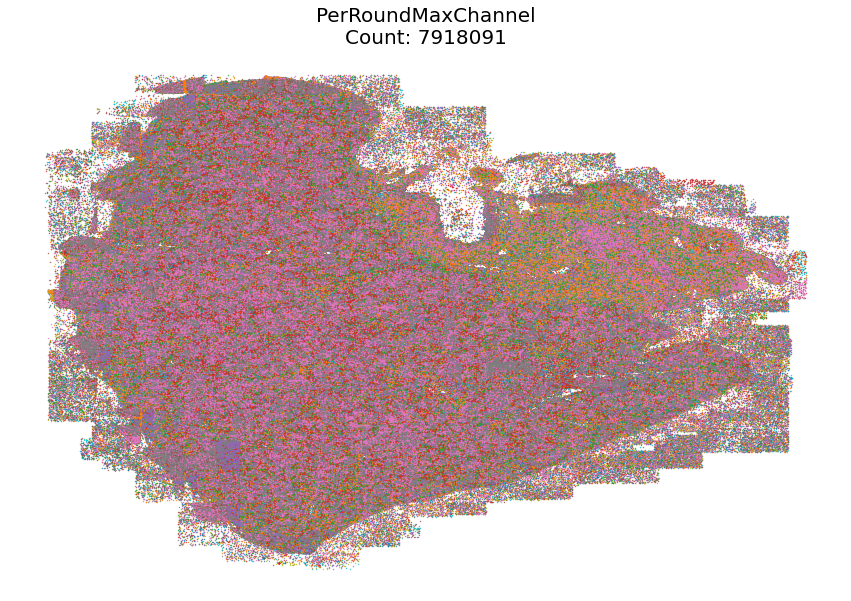

In [25]:
# scatter plotting groups
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
groups1 = appended_data_non_nan.groupby('target')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name1, group1 in groups1:
    ax.plot(group1.xc, group1.yc, marker='o', linestyle='', ms=0.4, label=name1)
#ax.legend()
plt.gca().invert_yaxis()
plt.axis('off')
plt.title('PerRoundMaxChannel' + '\n' + 'Count: ' + str(appended_data_non_nan.shape[0]), size = 20)
plt.show()

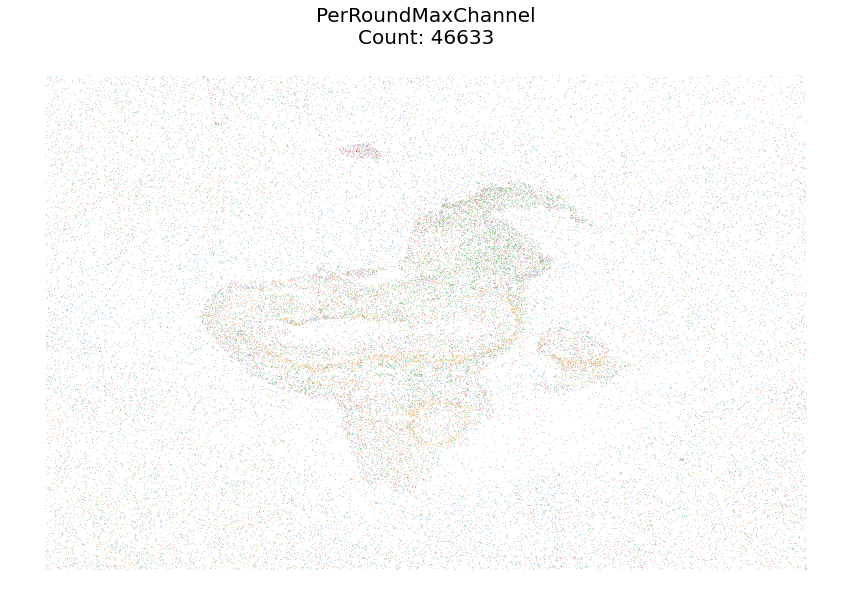

In [41]:
# scatter plotting groups
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
groups1 = appended_data_non_nan.groupby('target')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name1, group1 in groups1:
    ax.plot(group1.xc, group1.yc, marker='o', linestyle='', ms=0.1, label=name1)
#ax.legend()
plt.gca().invert_yaxis()
plt.axis('off')
plt.title('PerRoundMaxChannel' + '\n' + 'Count: ' + str(appended_data_non_nan.shape[0]), size = 20)
plt.show()

In [4]:

# run the script
experiment = starfish.Experiment.from_json("U:/S1T3_LUNGS/panel1/SpaceTX_format/experiment.json")



In [28]:
for i, (name_, fov) in enumerate(experiment.items()):
     print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


In [5]:
import os
import starfish
from starfish import data, FieldOfView
from starfish.image import ApplyTransform, Filter, LearnTransform, Segment
from starfish.spots import FindSpots, DecodeSpots, AssignTargets
from starfish.types import Axes, FunctionSource, Levels
from starfish.core.expression_matrix.expression_matrix import ExpressionMatrix
from starfish.core.intensity_table.intensity_table import IntensityTable
test = os.getenv("TESTING") is not None
from starfish.core.spots.DecodeSpots.trace_builders import build_spot_traces_exact_match
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from starfish.types import Axes, TraceBuildingStrategies
import warnings
warnings.filterwarnings('ignore')

In [13]:
def iss_pipeline(fov, codebook):
    primary_image = fov.get_image(FieldOfView.PRIMARY_IMAGES) # primary images
    dots = primary_image.reduce({Axes.CH, Axes.ROUND}, func="max") # reference round for image registration
    # register the raw image
    learn_translation = LearnTransform.Translation(reference_stack=dots, axes=Axes.ROUND, upsampling=100)
    transforms_list = learn_translation.run(primary_image.reduce({Axes.CH, Axes.ZPLANE}, func="max"))
    warp = ApplyTransform.Warp()
    registered = warp.run(primary_image, transforms_list=transforms_list,  in_place=False, verbose=True)
    # filter raw data
    masking_radius = 15
   # filt = Filter.WhiteTophat(masking_radius, is_volume=False)
    filtered = registered
    # Decode with PixelSpotDecoder
    psd = DetectPixels.PixelSpotDecoder(
        codebook=experiment.codebook,
        metric='euclidean',             # distance metric to use for computing distance between a pixel vector and a codeword
        norm_order=2,                   # the L_n norm is taken of each pixel vector and codeword before computing the distance. this is n
        distance_threshold=0.95,      # minimum distance between a pixel vector and a codeword for it to be called as a gene
        magnitude_threshold=0.025,    # discard any pixel vectors below this magnitude
        min_area=2,                     # do not call a 'spot' if it's area is below this threshold (measured in pixels)
        max_area=15,                # do not call a 'spot' if it's area is above this threshold (measured in pixels)
    )
    initial_spot_intensities, prop_results = psd.run(filtered)

# filter spots that do not pass thresholds
    spot_intensities = initial_spot_intensities.loc[initial_spot_intensities[Features.PASSES_THRESHOLDS]]

# Example of how to access the spot attributes
    print(f"The area of the first spot is {prop_results.region_properties[0].area}")

    # View labeled image after connected componenet analysis
    plt.imshow(prop_results.label_image[0])
    plt.title("PixelSpotDecoder Labeled Image")

    return spot_intensities

In [14]:
# process all the fields of view, not just one
def process_experiment(experiment: starfish.Experiment):
    decoded_intensities = {}
    regions = {}
    for i, (name_, fov) in enumerate(experiment.items()):
        print(name_)
        try:
            decoded = iss_pipeline(fov, experiment.codebook)
            decoded_intensities[name_] = decoded
        except:
            print('No blobs found in this tile')
            
        if test and i == 1:
            # only run through 2 fovs for the test
            break
    return decoded_intensities




NameError: name 'starfish' is not defined

In [10]:
starfish_output = 'U:/S1T3_LUNGS/panel1/starfish_output_270520/'
if not os.path.exists(starfish_output):
    os.mkdir(starfish_output)
import os
csv_files = sorted(os.listdir(starfish_output))
print(len(csv_files))
file ='U:/S1T3_LUNGS/panel1/SpaceTX_format/experiment.json'# add the path to the experiment.json file that you want to process
experiment = starfish.Experiment.from_json(file)
all_fovs = list(experiment.keys())
try:
    fovs_done = list(pd.DataFrame(csv_files)[0].str.split('.',expand = True)[0])
except KeyError:
    print('no FOVS done')
    fovs_done = []
not_done = [x for x in all_fovs if x not in fovs_done]

0
no FOVS done


fov_000


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.64it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_001


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.48it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_002


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.85it/s]
0it [00:00, ?it/s]


no blobs in tile


100%|████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 1614.77it/s]


fov_003
The area of the first spot is 2
fov_004


100%|██████████████████████████████████████████████████████████████████████████| 32149/32149 [00:15<00:00, 2094.06it/s]


The area of the first spot is 100
fov_005


100%|██████████████████████████████████████████████████████████████████████████████| 559/559 [00:00<00:00, 2126.34it/s]


The area of the first spot is 85
fov_006


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.27it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_007


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.69it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_008


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.39it/s]
0it [00:00, ?it/s]


no blobs in tile


100%|██████████████████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 1321.53it/s]


fov_009
The area of the first spot is 4
fov_010


100%|██████████████████████████████████████████████████████████████████████████| 19867/19867 [00:09<00:00, 2013.89it/s]


The area of the first spot is 8
fov_011


100%|████████████████████████████████████████████████████████████████████████| 236904/236904 [01:53<00:00, 2084.85it/s]


The area of the first spot is 19
fov_012


100%|██████████████████████████████████████████████████████████████████████████| 56024/56024 [00:26<00:00, 2109.86it/s]


The area of the first spot is 9
fov_013


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.25it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_014


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.30it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_015


100%|██████████████████████████████████████████████████████████████████████████████| 277/277 [00:00<00:00, 2356.10it/s]


The area of the first spot is 5
fov_016


100%|██████████████████████████████████████████████████████████████████████████| 34718/34718 [00:17<00:00, 2032.97it/s]


The area of the first spot is 4
fov_017


100%|████████████████████████████████████████████████████████████████████████| 279705/279705 [02:15<00:00, 2063.59it/s]


The area of the first spot is 50
fov_018


100%|████████████████████████████████████████████████████████████████████████| 421650/421650 [03:10<00:00, 2217.42it/s]


The area of the first spot is 15
fov_019


100%|████████████████████████████████████████████████████████████████████████| 235316/235316 [01:53<00:00, 2077.67it/s]


The area of the first spot is 2
fov_020


100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 1849.05it/s]


The area of the first spot is 37
fov_021


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.91it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_022


100%|████████████████████████████████████████████████████████████████████████████| 1660/1660 [00:00<00:00, 2257.65it/s]


The area of the first spot is 39
fov_023


100%|████████████████████████████████████████████████████████████████████████| 269063/269063 [01:47<00:00, 2499.68it/s]


The area of the first spot is 9
fov_024


100%|████████████████████████████████████████████████████████████████████████| 333270/333270 [02:35<00:00, 2148.49it/s]


The area of the first spot is 1575
fov_025


100%|████████████████████████████████████████████████████████████████████████| 403401/403401 [03:11<00:00, 2106.05it/s]


The area of the first spot is 3
fov_026


100%|████████████████████████████████████████████████████████████████████████| 455438/455438 [03:31<00:00, 2155.44it/s]


The area of the first spot is 1
fov_027


100%|████████████████████████████████████████████████████████████████████████████| 1276/1276 [00:00<00:00, 1792.36it/s]


The area of the first spot is 1
fov_028


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.57it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_029


100%|██████████████████████████████████████████████████████████████████████████| 11535/11535 [00:05<00:00, 2172.31it/s]


The area of the first spot is 92
fov_030


100%|████████████████████████████████████████████████████████████████████████| 375956/375956 [02:57<00:00, 2120.35it/s]


The area of the first spot is 10
fov_031


100%|████████████████████████████████████████████████████████████████████████| 270596/270596 [02:11<00:00, 2053.36it/s]


The area of the first spot is 655
fov_032


100%|████████████████████████████████████████████████████████████████████████| 416834/416834 [03:23<00:00, 2051.20it/s]


The area of the first spot is 133
fov_033


100%|████████████████████████████████████████████████████████████████████████| 494150/494150 [02:56<00:00, 2802.65it/s]


The area of the first spot is 56
fov_034


100%|██████████████████████████████████████████████████████████████████████████| 65181/65181 [00:32<00:00, 2021.46it/s]


The area of the first spot is 298
fov_035


100%|██████████████████████████████████████████████████████████████████████████| 47407/47407 [00:23<00:00, 1988.84it/s]


The area of the first spot is 13
fov_036


100%|██████████████████████████████████████████████████████████████████████████| 23279/23279 [00:11<00:00, 2023.47it/s]


The area of the first spot is 27
fov_037


100%|████████████████████████████████████████████████████████████████████████| 285796/285796 [01:46<00:00, 2693.13it/s]


The area of the first spot is 6
fov_038


100%|████████████████████████████████████████████████████████████████████████| 186318/186318 [01:20<00:00, 2323.27it/s]


The area of the first spot is 1
fov_039


100%|████████████████████████████████████████████████████████████████████████| 347033/347033 [02:13<00:00, 2603.61it/s]


The area of the first spot is 3
fov_040


100%|████████████████████████████████████████████████████████████████████████| 458348/458348 [03:24<00:00, 2242.23it/s]


The area of the first spot is 5
fov_041


100%|████████████████████████████████████████████████████████████████████████| 180954/180954 [01:11<00:00, 2547.40it/s]


The area of the first spot is 1
fov_042


100%|██████████████████████████████████████████████████████████████████████████| 22083/22083 [00:12<00:00, 1803.21it/s]


The area of the first spot is 5726
fov_043


100%|██████████████████████████████████████████████████████████████████████████| 70913/70913 [00:31<00:00, 2265.62it/s]


The area of the first spot is 106
fov_044


100%|██████████████████████████████████████████████████████████████████████████| 99500/99500 [00:45<00:00, 2204.92it/s]


The area of the first spot is 15
fov_045


100%|██████████████████████████████████████████████████████████████████████████| 82281/82281 [00:33<00:00, 2449.38it/s]


The area of the first spot is 14
fov_046


100%|████████████████████████████████████████████████████████████████████████| 295496/295496 [02:09<00:00, 2285.73it/s]


The area of the first spot is 403
fov_047


100%|████████████████████████████████████████████████████████████████████████| 328293/328293 [02:20<00:00, 2341.78it/s]


The area of the first spot is 5
fov_048


100%|████████████████████████████████████████████████████████████████████████| 132211/132211 [00:57<00:00, 2282.26it/s]


The area of the first spot is 218
fov_049


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1321.58it/s]


The area of the first spot is 8
fov_050


100%|██████████████████████████████████████████████████████████████████████████| 19124/19124 [00:06<00:00, 3051.27it/s]


The area of the first spot is 315
fov_051


100%|██████████████████████████████████████████████████████████████████████████| 55039/55039 [00:24<00:00, 2211.78it/s]


The area of the first spot is 6
fov_052


100%|██████████████████████████████████████████████████████████████████████████| 94026/94026 [00:38<00:00, 2466.18it/s]


The area of the first spot is 10
fov_053


100%|████████████████████████████████████████████████████████████████████████| 189278/189278 [01:24<00:00, 2238.62it/s]


The area of the first spot is 289
fov_054


100%|████████████████████████████████████████████████████████████████████████| 278287/278287 [01:59<00:00, 2331.71it/s]


The area of the first spot is 26
fov_055


100%|██████████████████████████████████████████████████████████████████████████| 77554/77554 [00:36<00:00, 2133.82it/s]


The area of the first spot is 34
fov_056


100%|██████████████████████████████████████████████████████████████████████████████| 119/119 [00:00<00:00, 1629.77it/s]


The area of the first spot is 14
fov_057


100%|████████████████████████████████████████████████████████████████████████████| 7579/7579 [00:03<00:00, 2199.32it/s]


The area of the first spot is 1
fov_058


100%|██████████████████████████████████████████████████████████████████████████| 56008/56008 [00:24<00:00, 2329.22it/s]


The area of the first spot is 21
fov_059


100%|████████████████████████████████████████████████████████████████████████| 166286/166286 [00:47<00:00, 3518.48it/s]


The area of the first spot is 1
fov_060


100%|████████████████████████████████████████████████████████████████████████| 216782/216782 [01:35<00:00, 2274.07it/s]


The area of the first spot is 462
fov_061


100%|████████████████████████████████████████████████████████████████████████| 239283/239283 [01:36<00:00, 2490.41it/s]


The area of the first spot is 1
fov_062


100%|██████████████████████████████████████████████████████████████████████████| 45082/45082 [00:17<00:00, 2524.41it/s]


The area of the first spot is 103
fov_063


100%|████████████████████████████████████████████████████████████████████████████| 5716/5716 [00:01<00:00, 3107.95it/s]


The area of the first spot is 1
fov_064


100%|████████████████████████████████████████████████████████████████████████| 112737/112737 [00:45<00:00, 2450.91it/s]


The area of the first spot is 12
fov_065


100%|████████████████████████████████████████████████████████████████████████| 144139/144139 [00:53<00:00, 2708.58it/s]


The area of the first spot is 3
fov_066


100%|████████████████████████████████████████████████████████████████████████| 130839/130839 [00:51<00:00, 2522.56it/s]


The area of the first spot is 16
fov_067


100%|████████████████████████████████████████████████████████████████████████| 193173/193173 [00:52<00:00, 3653.49it/s]


The area of the first spot is 42
fov_068


100%|████████████████████████████████████████████████████████████████████████| 155634/155634 [00:53<00:00, 2928.22it/s]


The area of the first spot is 131
fov_069


100%|████████████████████████████████████████████████████████████████████████████| 7998/7998 [00:03<00:00, 2308.99it/s]


The area of the first spot is 44
fov_070


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.53it/s]
0it [00:00, ?it/s]


no blobs in tile
fov_071


100%|████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 1227.64it/s]


The area of the first spot is 88
fov_072


100%|██████████████████████████████████████████████████████████████████████████| 20834/20834 [00:08<00:00, 2594.66it/s]


The area of the first spot is 62
fov_073


100%|██████████████████████████████████████████████████████████████████████████| 26352/26352 [00:10<00:00, 2454.21it/s]


The area of the first spot is 686
fov_074


100%|██████████████████████████████████████████████████████████████████████████| 20570/20570 [00:07<00:00, 2708.13it/s]


The area of the first spot is 133
fov_075


100%|██████████████████████████████████████████████████████████████████████████████| 971/971 [00:00<00:00, 4071.67it/s]


The area of the first spot is 1
fov_076


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.46it/s]
0it [00:00, ?it/s]


no blobs in tile


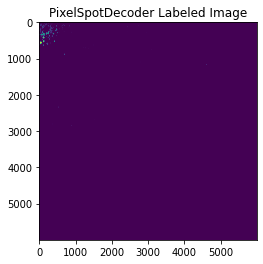

In [11]:
for i in not_done:
    print(i)
    fov = experiment[i]
    try:
        decoded = iss_pipeline(fov, experiment.codebook)
        featuresDF = (decoded.to_features_dataframe())
        featuresDF.to_csv(starfish_output + i+'.csv')
    except:
        print("no blobs in tile")

In [32]:
decoded_intensities = process_experiment(experiment)

fov_000


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.62it/s]


No blobs found in this tile
fov_001
No blobs found in this tile
fov_002
No blobs found in this tile
fov_003


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.17it/s]


No blobs found in this tile
fov_004

KeyboardInterrupt: 

In [ ]:
spot_intensities=decoded_intensities

###ANALYSIS
def getList(dict): 
    return dict.keys() 
np.shape(decoded_intensities)

In [ ]:
import os

import starfish
from starfish.image import ApplyTransform, Filter, LearnTransform, Segment
from starfish.spots import FindSpots, DecodeSpots, AssignTargets
from starfish.types import Axes, FunctionSource
%matplotlib inline

import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pprint

from starfish import data, FieldOfView, Experiment
from starfish.types import Features, Axes
from starfish.util.plot import imshow_plane
test = os.getenv("TESTING") is not None

In [ ]:
FOVS =getList(decoded_intensities)
FOVS = list(FOVS)
appended_data = []

for i, FOV in enumerate(FOVS):
    FOV_data = decoded_intensities[FOV].to_features_dataframe()
    appended_data.append(FOV_data)
appended_data = pd.concat(appended_data)

appended_data.shape


In [ ]:
appended_data_non_nan = appended_data[appended_data.target != 'nan']
appended_data.to_csv('U:/S1T3_LUNGS/panel1/decoded_SpotBased_sparse_Test1_sample8_45_threshold003_panel1.csv', sep = ',')

In [ ]:
# scatter plotting groups
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
groups1 = appended_data_non_nan.groupby('target')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name1, group1 in groups1:
    ax.plot(group1.xc, group1.yc, marker='o', linestyle='', ms=0.01, label=name1)
#ax.legend()
plt.gca().invert_yaxis()
plt.axis('off')
plt.title('PerRoundMaxChannel' + '\n' + 'Count: ' + str(appended_data_non_nan.shape[0]), size = 20)
plt.show()